# Chapter 1. Giving Computers the Ability to Learn from Data

이 장에서 다룰 내용은...
- machine learning의 일반적인 개념
- 3가지 종류의 Learning과 기본적인 용어
- 좋은 machine learning system을 design 하기 위한 building blocks.
- python setting up

### The three different types of machine learning

Machine learning에서는 데이터를 이용해 하려는 일을 크게 아래 3가지로 나눌 수 있다.

<img  src="./_images/01_01.png"/>

###### (1) Supervised Learning(지도 학습)

> **Supervised learning** is the machine learning task of <u>inferring a function from labeled training data.</u> - wikipedia

즉 label이 있는 데이터가 주어졌을 때    
label과 나머지 변수들간의 관계를 알아내는 것     
(그 관계를 표현할 수 있는 function을 알아내는 것)    

여기에서 label은 dependent variable(종속변수), outcome(결과)을 의미하여, 보통 변수 $y$로 표시함

$$y = f(x_1, x_2, \dots , x_p)$$

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('http://www.math.uah.edu/stat/data/Galton.csv')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


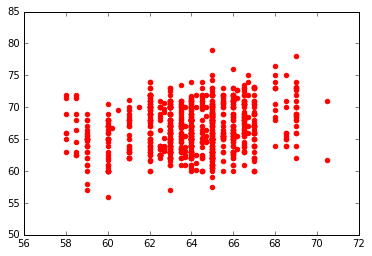

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

x_father = df.iloc[:, 1].values
x_father = df.iloc[:, 2].values
y = df.iloc[:,4].values
plt.scatter(x_father, y, color='red')
plt.show()

예를들어 위와 같은 데이터가 주어졌다고 해 보자.    
(자녀의 키와 부모의 키에 관한 Francis Galton의 1885년 연구 데이터)      

데이터는 [가족번호, 아버지의 키, 어머니의 키, 자녀의 성별, 자녀의 키, 가족의 자녀 수]의 6개 컬럼으로 구성되어 있다.      
만약 우리의 관심사가 '아버지의 키가 자녀의 키(성인이 된 후)에 어떤 영향을 미지는지'라면        
이 문제를 풀 수 있는 방법론은 무수히 많다.(Regression, SVM, Neural net, Decision Tree, ... 등등)   


아주 간단한 예로 아래와 같은 모형을 만들고   
[자녀의 키] = $w_0$ + $w_1 \times$[아버지의 키]       

$w_0$과 $w_1$를 알아내서       
independent variable([아버지의 키])과 dependent variable([자녀의 키]) 사이의       
관련성에 대한 (정확하지는 않지만) 지식을 얻을 수 있을 것이다.     

또한 이런 지식이 만들어지면 기존 데이터에 없던 새로운 [아버지의 키]가 주어졌을 때    
자녀의 키를 예측해 볼 수 있을 것이다.

Supervised Learning은 정답(taret, label, 종속변수, dependent variable, y)의 값이 연속형 값이냐 혹은 범주형 값이냐에 따라 방법론이 크게 두가지로 나뉜다.


<u>Classification</u>

우선 그 값이 범주형(불연속, 예를들어 성별과 같이 남자/여자)인 경우, 이런 문제를 Classification(분류) problem이라 부른다. 

<img  src="./_images/01_regression.PNG"/>

<u>Regression</u>

반면 그 값이 연속형(키, 나이 등)인 경우 이런 문제를 Regression 문제라고도 부른다.

<img  src="./_images/01_classification.PNG"/>

###### (2) Reinforcement Learning(강화 학습)

> **Reinforcement learning** is an area of machine learning inspired by behaviorist psychology, concerned with how software agents ought to <u>take actions in an environment so as to maximize some notion of cumulative reward.</u> - wikipedia


<img  src="./_images/01_reinforcement.PNG"/>

Reinforcement Learning은 현재의 상태와 환경이 주어졌을 때 어떤 목표(reward)값을 더 잘 달성하도록 모형의 상태값이나 파라미터를 바꾸도록 하는 시스템을 만드는 것을 의미한다.

예를들어 레이싱 게임내에서 여러 환경적 상황(장애물, 다른 레이싱 카 등)을 겪는 순간 순간 어떤 위치적 판단을 해야, 어느 정도 시간 후 좋은 상태(완주 하거나, 계속 달리고 있거나, 코인을 많이 획득 했거나)의 총계가 최대가 될지를 학습 것과 같이 현재의 상태와 현재의 환경이 주어졌을 때 누적된 보상(reward)이 최대가 되도록 다음 상태를 결정하는 어떤 정책을 학습하는 방법을 말한다.

아래와 같이 게임플레이를 학습하는 것도 가능    
(<a href='https://arxiv.org/abs/1312.5602'>Playing Atari with Deep Reinforcement Learning</a>)

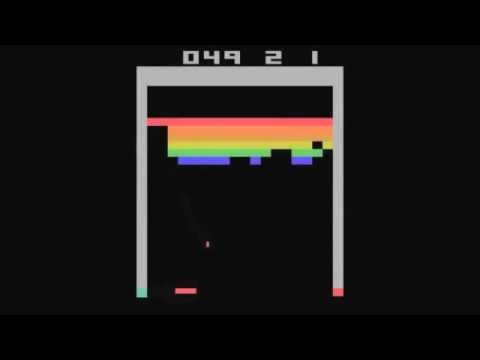

In [1]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('iqXKQf2BOSE')

###### (3) Unsupervised Learning(비지도 학습)

> **Unsupervised machine learning** is the machine learning task of <u>inferring a function</u> to describe hidden structure <u>from unlabeled data.</u> - wikipedia


Unsupervised learning은 정해진 정답(target)이 없는 데이터에서 어떤 유의미한 지식(군집 혹은 보상 등)을 찾는 방법론들을 의미한다.

<u>Finding subgroups with clustering</u>

각 개체가 어떤 group에 속할지에 대한 정보(label)이 없는 데이터를 몇개의 군집(subgroup, cluster)으로 나누는 방법론을 **Clustering**이라 한다.

K-means algorithm, hierarchical clustering, DBSCAN, EM(Expectation-Maximization)  clustering, Biclustering 등 다양한 방법론이 있음.

<img  src="./_images/01_clustering.PNG"/>

<u>Dimensionality reduction for data compression</u>

고차원의 데이터($x_i$가 많은..)를 저차원의 데이터로 축약하는 방법으로 고차원 데이터의 시각화나 Noise의 제거 혹은 처리 속도를 빠르게할 목적으로 사용한다. 

예를들어 3차원 상의 물체에 대한 그림자를 2차원상에 투영할 수 있고 이 2차원 이미지를 이용해 물체를 나타낼 수 있고, 이 과정에서 정보 손실이 발생하지만 데이터의 특성을 가능한 손상시키지 않으면서 차원 축소를 수행하는 다양한 방법들이 있다. 

PCA, Kernel PCA, LDA, GDA 등 다양한 방법론이 있음.

<img  src="./_images/01_PCA.PNG"/>

### Terminology and notations

앞으로 사용될 용어와 표기법에 대해 알아본다.

우선 clustering을 논할때 자주 사용하는 예제 데이터 하나를 살펴보자. 아래 데이터는 iris(붗꽃)의 145개를 채취하여 꽃받침의 길이(Sepal Length), 꽃받침의 너비(Sepal Width), 꽃잎의 길이(Petal Length), 꽃잎의 너비(Petal Width)를 측정한 데이터이다. 

물론 데이터에는 각 꽃이 Setosa, Verginica, Versicolor 중 어떤 종(species)에 속하는지의 label이 표시 되어 있으나, 이 label이 없이 꽃잎의 측정값만을 이용해 label을 나눠 볼 수도 있다.

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


<img  src="./_images/01_iris_setosa.jpg"/>

<img  src="./_images/330px-Iris_virginica.jpg"/>

<img  src="./_images/01_iris_versicolor.jpg"/>

.

<img  src="./_images/01_iris.png"/>

앞서의 데이터는 145개 꽃에 대한 각 4개의 특성을 나타내고 있다.    
이들은 각 개체가 어떤 종(species)에 속할지에 대한 특성(attribute), 설명변수(explainatory variable) 혹은 feature 라고 할 수 있다. 

이런 속성들 전체를 145x4 matrix로 나타낼 수 있고,      
기호로는 $\mathbf{X}$혹은 $\mathbf{X} \in \mathbb{R}^{145 \times 4}$로 표기한다.      
이 matrix의 $i$번째 column은 $\mathbf{x}_i \in \mathbb{R}^{145 \times 1}$로 표기하고,     
$j$번째 row는 $\mathbf{x}^{(j)} \in \mathbb{R}^{1\times4}$로 표기한다.      
이때 변수의 개수(여기에서는 4)를 보통 $p$로 표시하고,       
데이터의 건수(여기에서는 145)를 주로 $n$으로 표기한다.

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


<img  src="./_images/01_regression.PNG"/>

또한 145개 꽃이 어떤 종에 속하는지를 나타내는 145개의 label을 생각해볼 수 있다.     
label은 보통 (일반 소문자)$y$로 표현하고,      
145개의 label전체를 (column vector) $\mathbf{y}$ 혹은 $\mathbf{y} \in \mathbb{R}^{145 \times 1}$로 표기하고,         
$i$번째 개체의 label을 $y_i$로 표기한다.

(※ matrix는 볼드 대문자, vector는 소문자 볼드(기본적으로 컬럼 벡터를 나타낸다.), scalar 값은 일반 소문자를 사용한다.)

### 전체 머신러닝 시스템 구성/과정

- Preprocessing    
: 데이터 전처리 과정으로서 측정치의 단위를 변환하거나,     
정규화, 가변수 변환, 변수 선택, 차원축소,        
데이터 분할(training, validation set, test set) 등의 과정을 거침


- Training a model    
 : 모델의 파라미터 값을 구하는 과정


- Selecting a model    
 : 데이터의 다양한 상황에 따라 다른 모형이 더 좋은 성능을 보이기도 함,       
 따라서 다양한 모형을 시도해보고 각 모형의 예측값을 가중평균하거나, 특정 모형을 선택하기도 함.


- Evaluating models    
 : 최종적으로 모형이 완성되었다면 이 모형이 새로운 데이터에 얼마나 좋은 성능을 보이는지 객관적인 지표를 측정하는 과정


- Predicting unseen data instances     
 : 모형을 사용하여 새로운 관측값에 대한 예측

### Using Python for machine learning

<u>Python 설치</u>

- Python 공식 페이지(https://www.python.org/)에서 사용하는 OS에 맞는 설치파일을 받아 설치 (교재에서의 코드는 3.4.3이상 버전으로 작성됨) 및 필요한 패키지들 설치


- 혹은 Anaconda(Data science, math, engineering을 위한 package들이 포함되어 있음)를 받아 설치(https://www.continuum.io/downloads)

<u>사용할 주요 Package</u>

- NumPy(넘파이) : array data type과 기본적인 연산(Indexing, sorting, reshaping 등) 정의   
- SciPy(싸이파이) : 보다 확장된 선형대수 연산 모듈     
- Pandas(판다스) : 데이터 가공, 기본적인 분석을 위한 모듈   
- scikit-learn(싸이킷 런) : SciPy 기반의 머신러닝 모듈    
- matplotlib : 데이터 시각화 

<img  src="./_images/01_python_stack.PNG"/>

<div align="right">Reference: http://quasiben.github.io/PyDataEMC/#/9</div>

.

.